In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [17]:
nx = 31
ny = 31
nt = 10
nu = 0.05
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = 0.25
dt = sigma*dx*dy/nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))



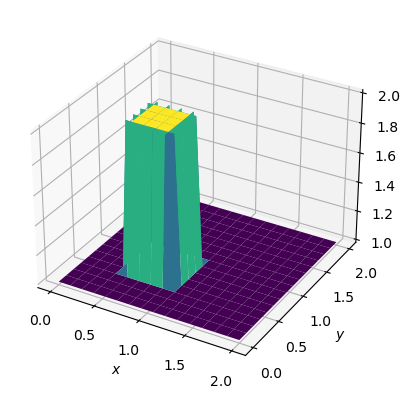

In [18]:
#Initial Conditions



u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');


In [26]:
def diffuse(nt):
    u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

    for n in range(nt+1):
        un = u.copy()

        u[1:-1, 1:-1] = un[1:-1, 1:-1] +\
                        nu * dt / dx**2 * (un[1:-1,2:] - 2 * un[1:-1,1:-1] + un[1:-1,:-2]) +\
                        nu * dt / dy**2 * (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[:-2,1:-1])

        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');


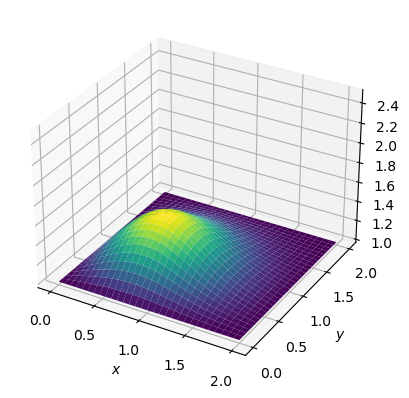

In [27]:
diffuse(50)

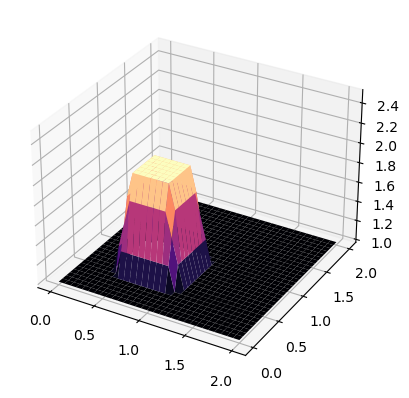

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.cm as cm


# Define domain

nx = 31
ny = 31
nt = 50
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((nx, ny))
un = np.ones((nx, ny))


u[int(0.5 / dy) : int(1 / dy + 1), int(0.5 / dx) : int(1 / dx + 1)] = 2

zarray = np.zeros((nx, ny, nt))

for n in range(nt):
    un = u.copy()
    u[1:-1, 1:-1] = (
        un[1:-1, 1:-1]
        + nu * dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2])
        + nu * dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1])
    )

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    zarray[:, :, n] = u.copy()


def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:, :, frame_number], cmap="magma")


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_zlim(1, 2.5)
X, Y = np.meshgrid(x, y)
plot = [ax.plot_surface(X, Y, zarray[:, :, 0], color="0.75", rstride=1, cstride=1)]


ani = animation.FuncAnimation(
    fig, update_plot, nt, fargs=(zarray, plot), interval=1000 / 30
)



In [29]:
plt.rcParams['animation.html'] = 'html5'
ani